In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Reading And Understanding the Data**



In [79]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [80]:
bike_data.shape

(730, 16)

In [81]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [82]:
# Check if any null values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [83]:
#Rename Columns to better names
bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity','dteday':'date','cnt':'count'}, inplace=True)


In [84]:
bike_data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:
bike_data.drop_duplicates(inplace=True)
bike_data.shape

(730, 16)

In [86]:
# dropping the unwanted columns
bike_data.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [87]:
bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [88]:
bike_data.month = bike_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [89]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


**Visualising Data**


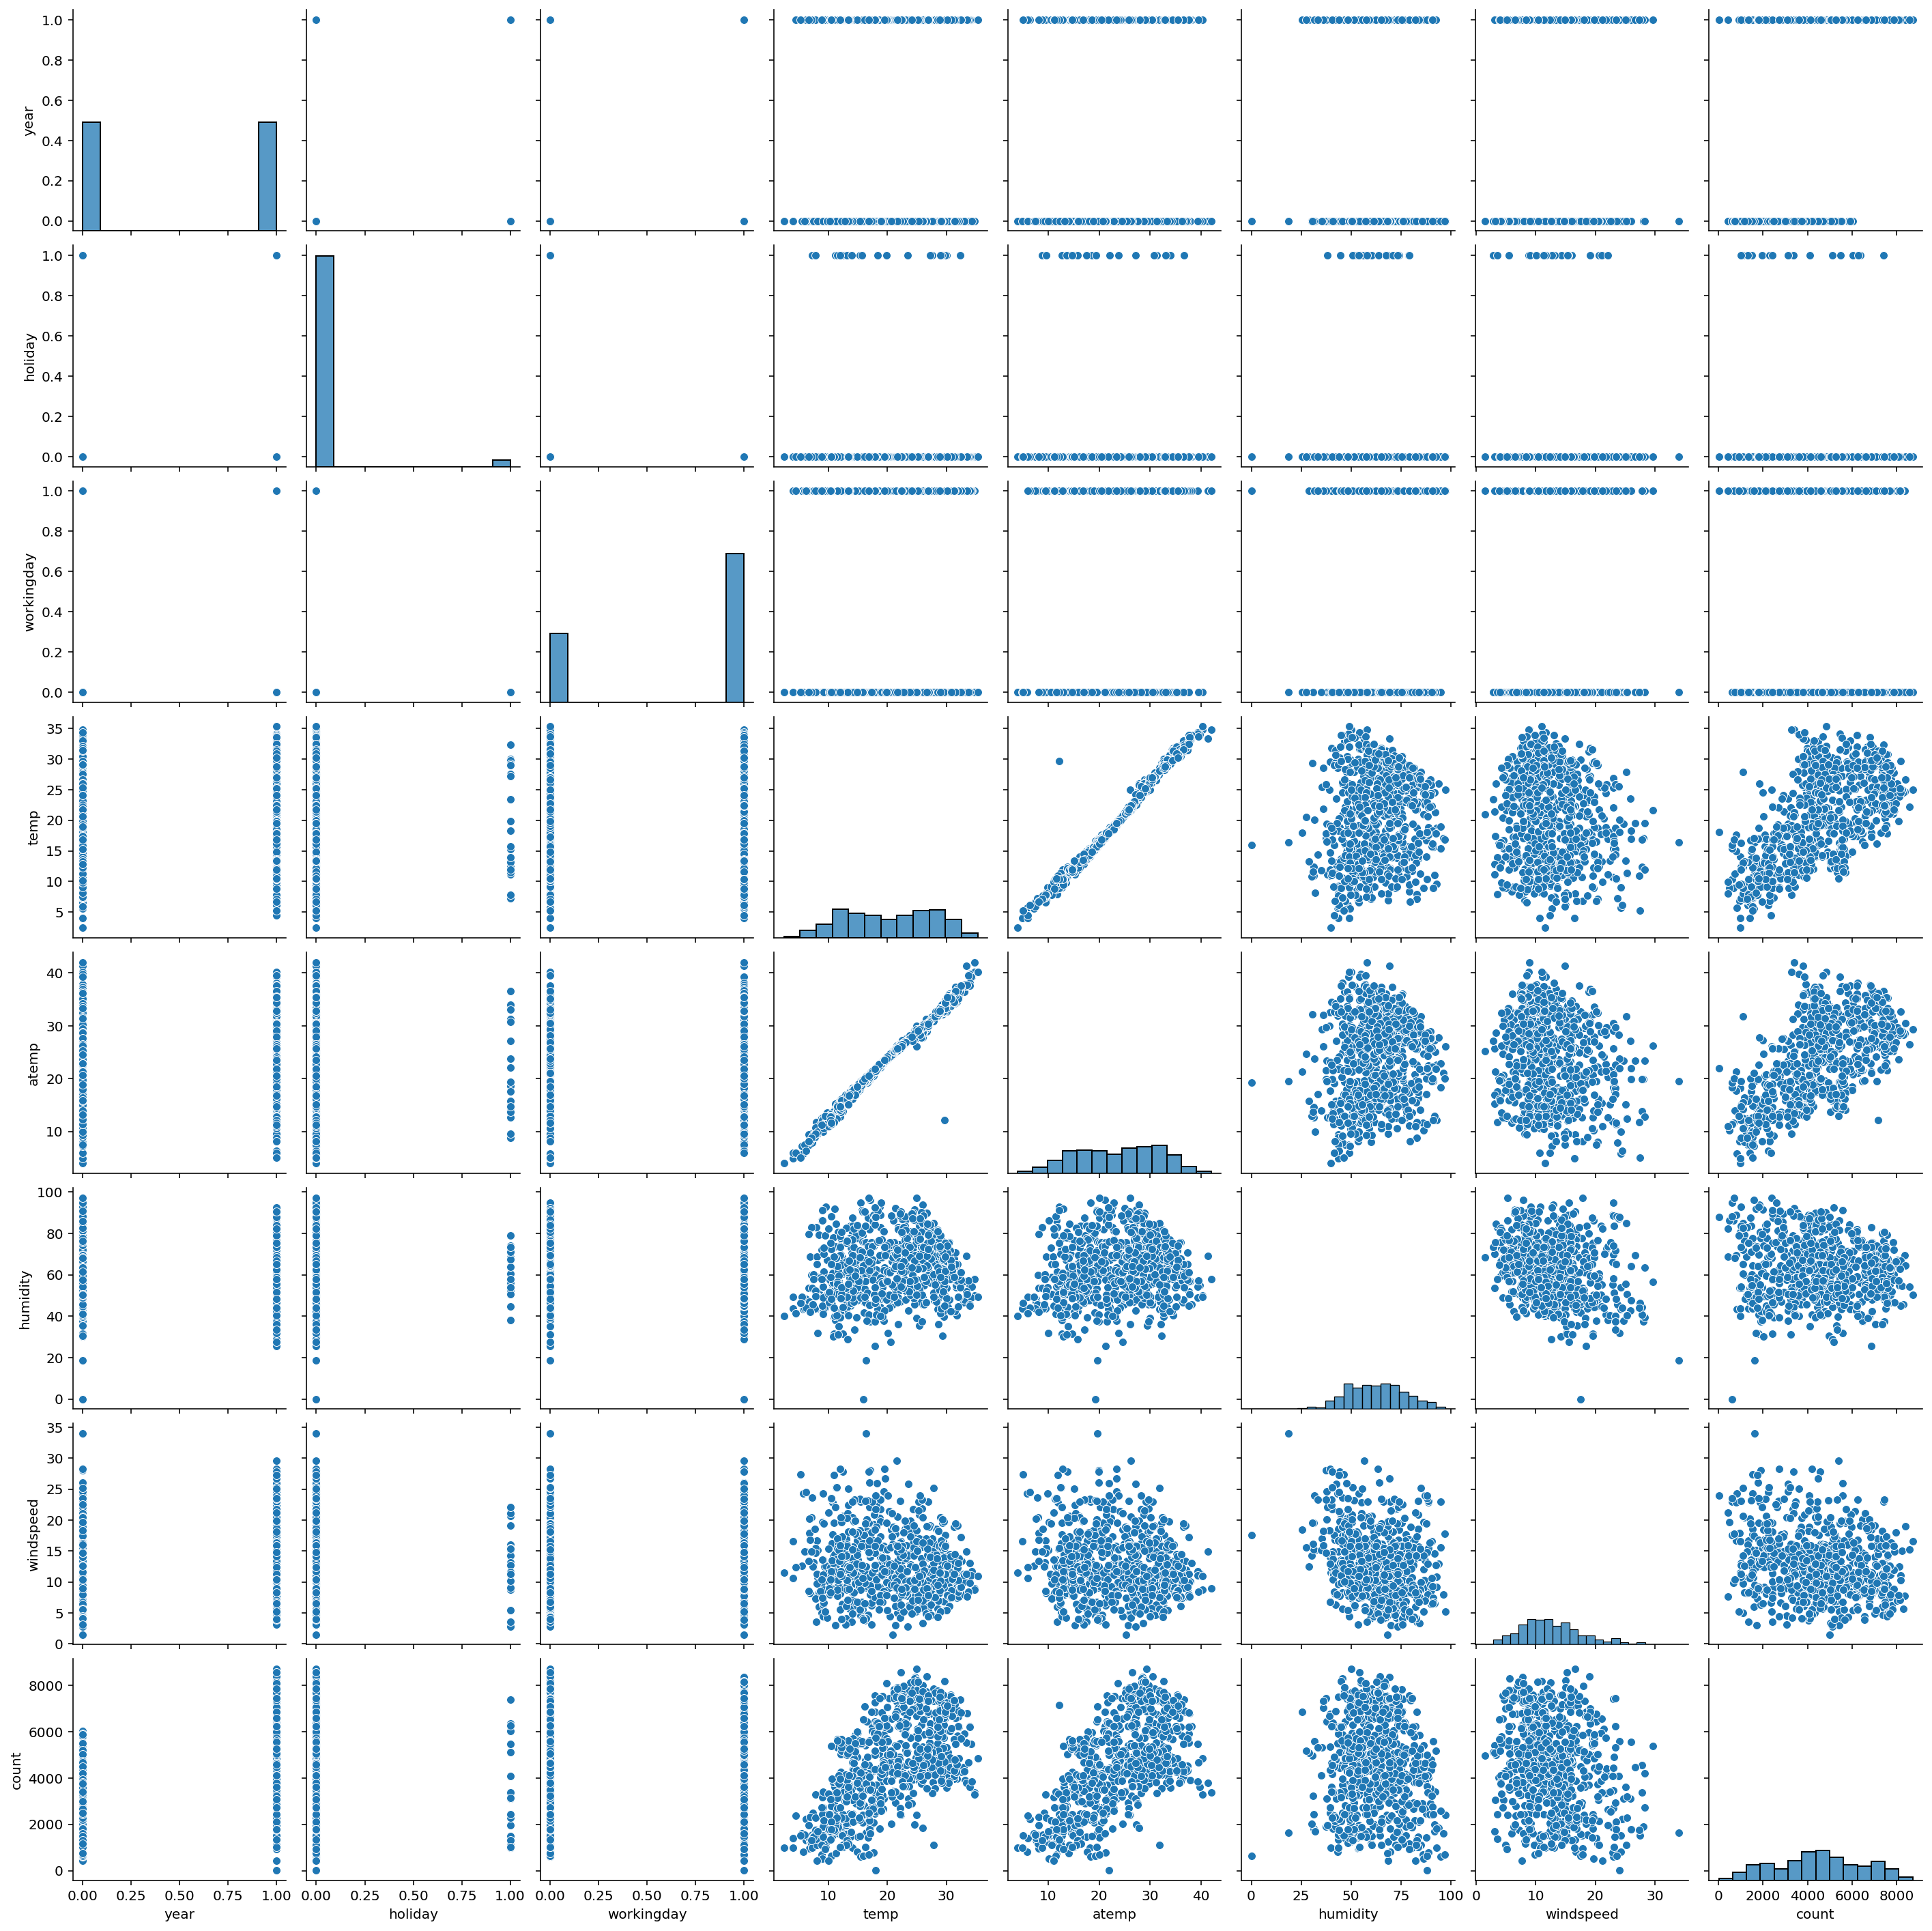

In [90]:
#Check if linear regression is valid for numerical variables
sns.pairplot(bike_data)
plt.show()

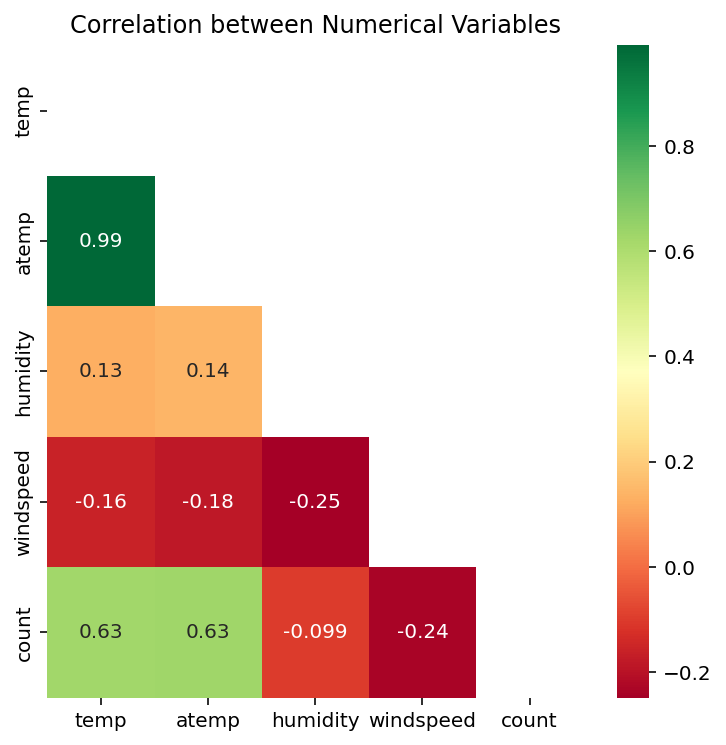

In [91]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(bike_data[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(bike_data[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There seems to be high correlation between **atemp** and **temp,** which is a case of multi\-collinearity. We need to decide which of these variables we will use on the basis of VIF & p\-value. 


<Axes: xlabel='weathersit', ylabel='count'>

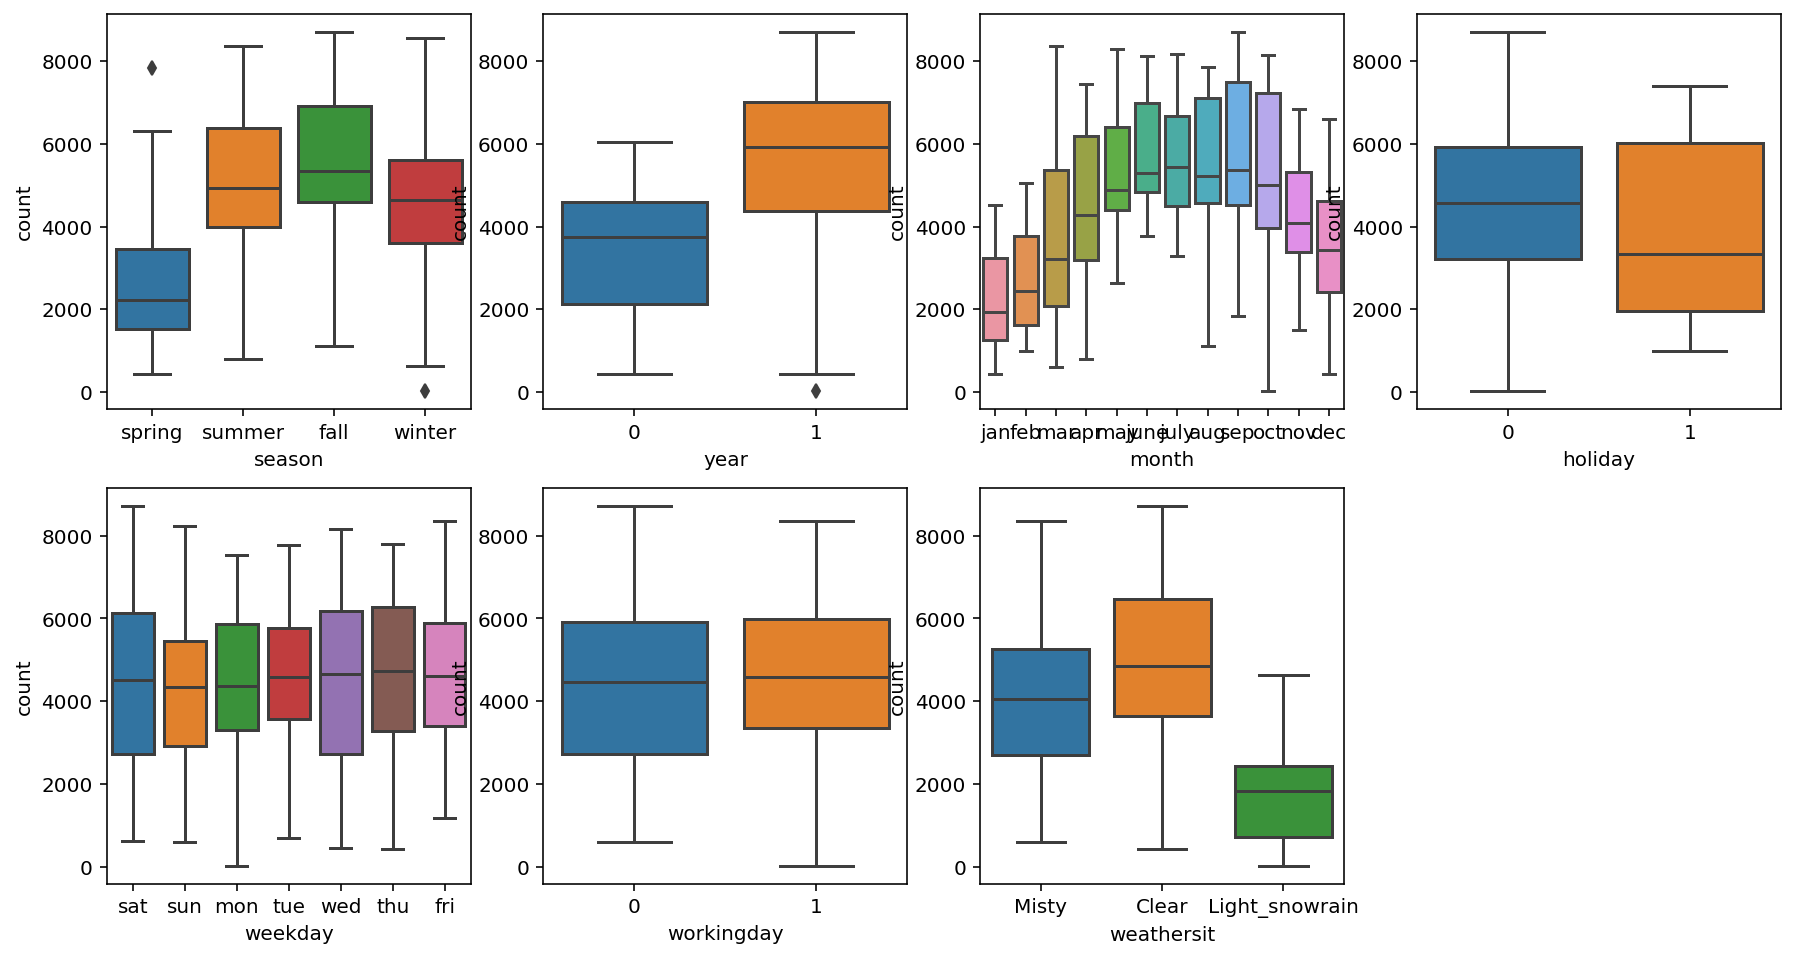

In [92]:
#Check if linear regression is valid for categorical variables
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='count',data=bike_data)
plt.subplot(2,4,2)
sns.boxplot(x='year',y='count',data=bike_data)
plt.subplot(2,4,3)
sns.boxplot(x='month',y='count',data=bike_data)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='count',data=bike_data)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='count',data=bike_data)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='count',data=bike_data)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='count',data=bike_data)


In [93]:
def plot_bar_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='count',data=bike_data)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='count',data=bike_data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

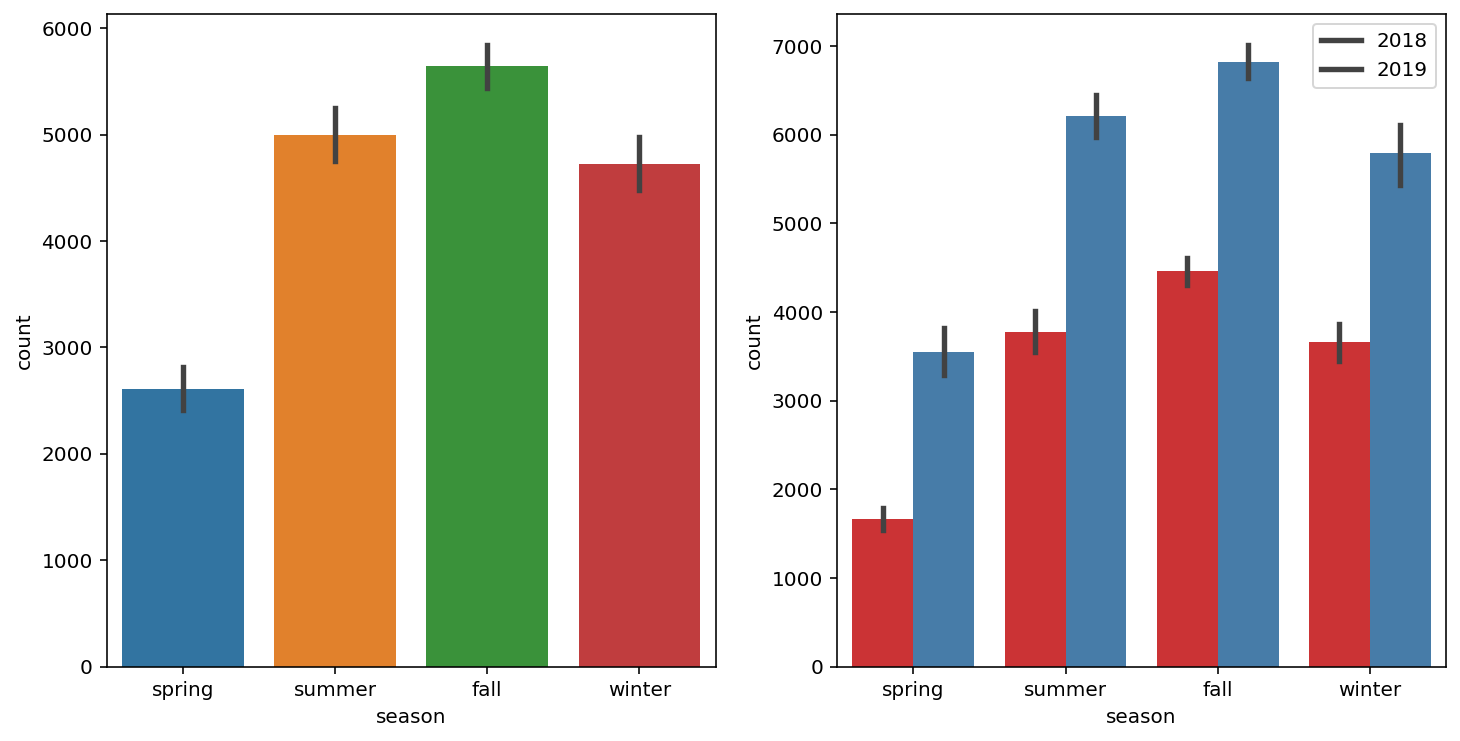

In [94]:
plot_bar_columns('season')


Fall season shows more users as compared to others, Also overall users are much higher in 2019 compared to previous year



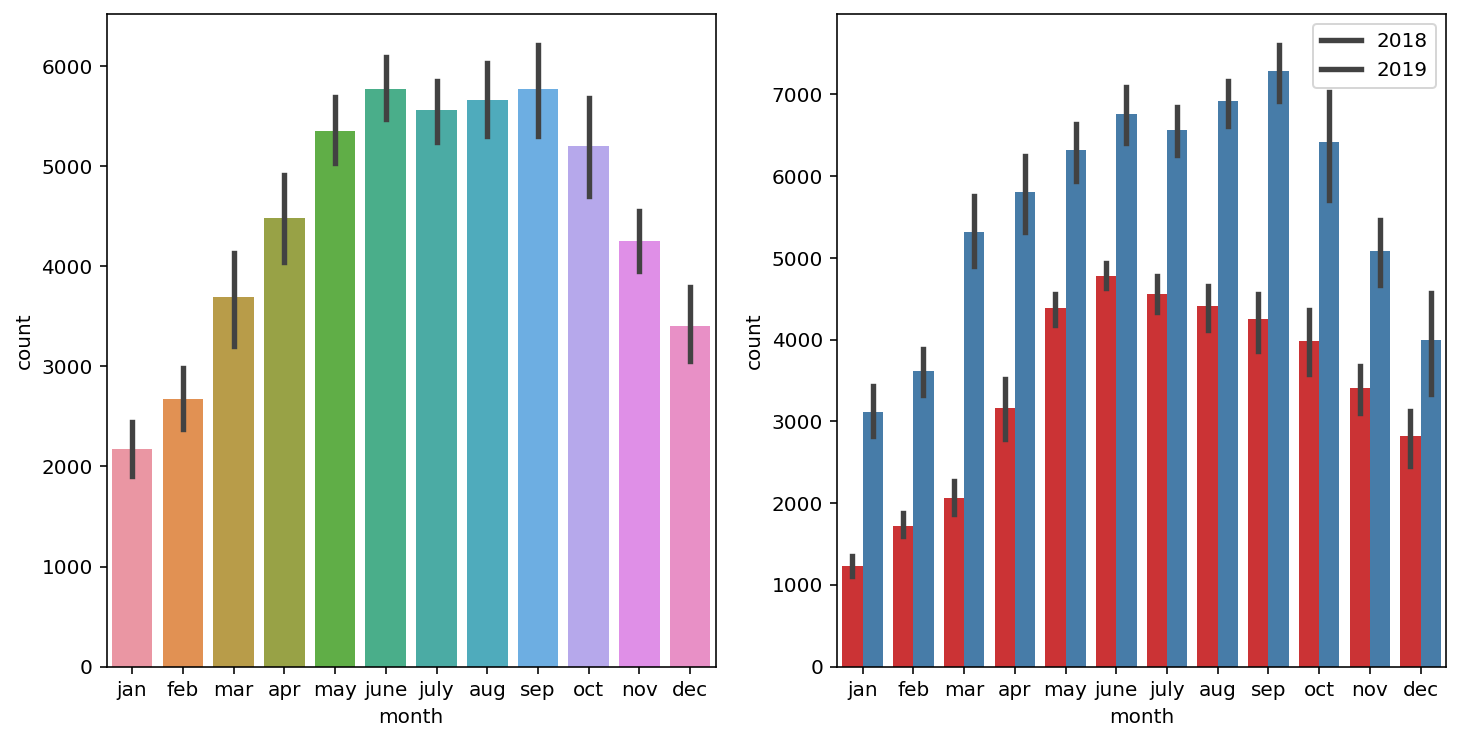

In [95]:
plot_bar_columns('month')

Peak season is around mid of the year, and bookings are less towards starting and ending of the year



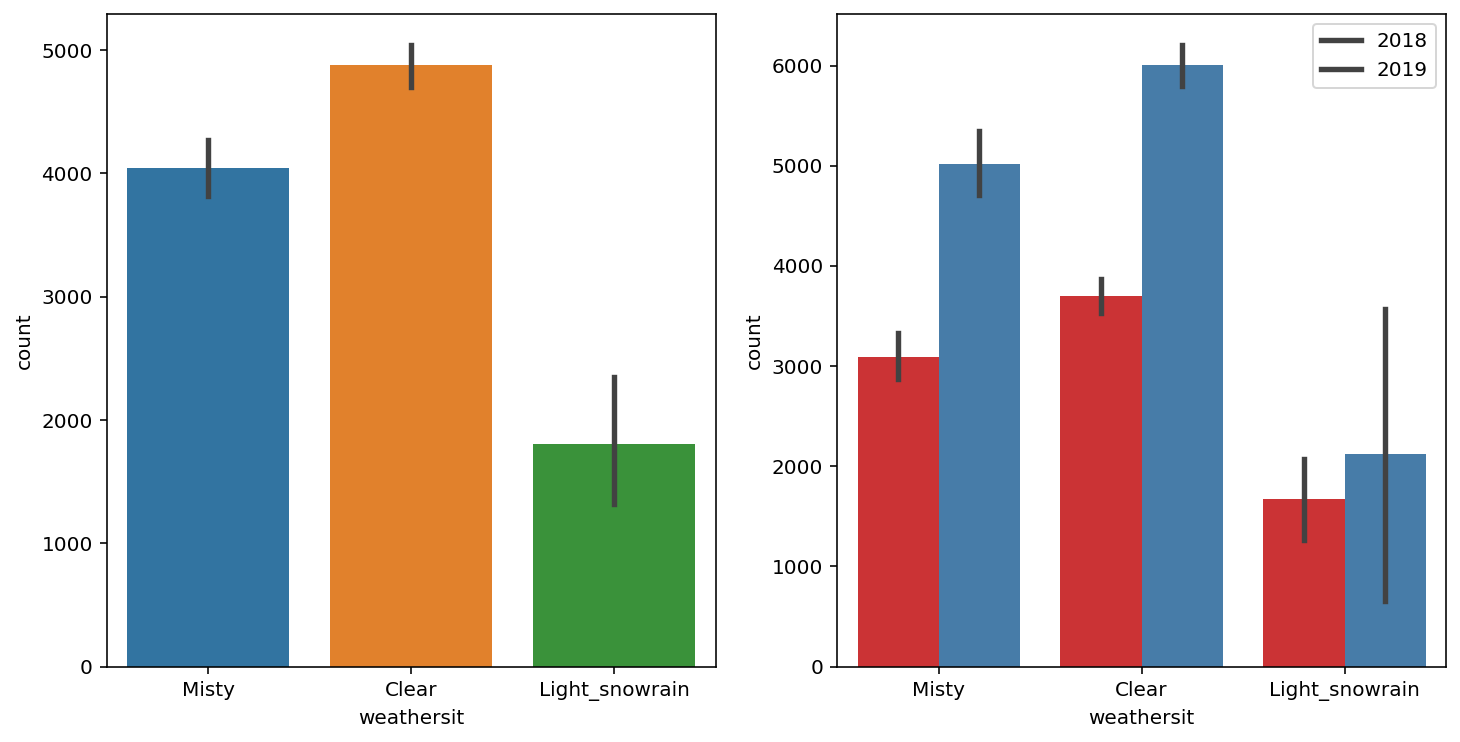

In [96]:
plot_bar_columns('weathersit')

Clear weather has more customers followed by Misty.



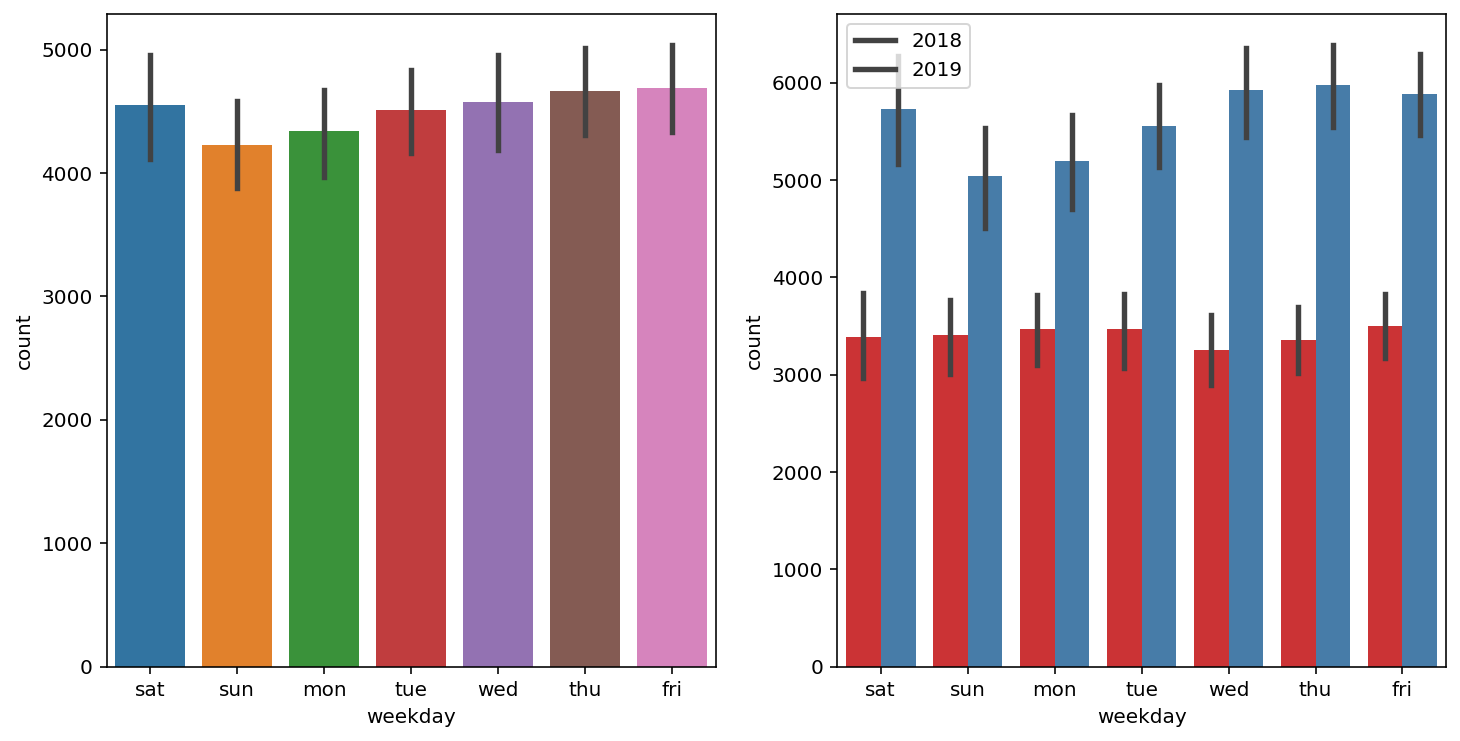

In [97]:
plot_bar_columns('weekday')

Thurs, Fri & Sat show high number of customers & Sun shows low number of customers probably due to holiday and people spending more time at home



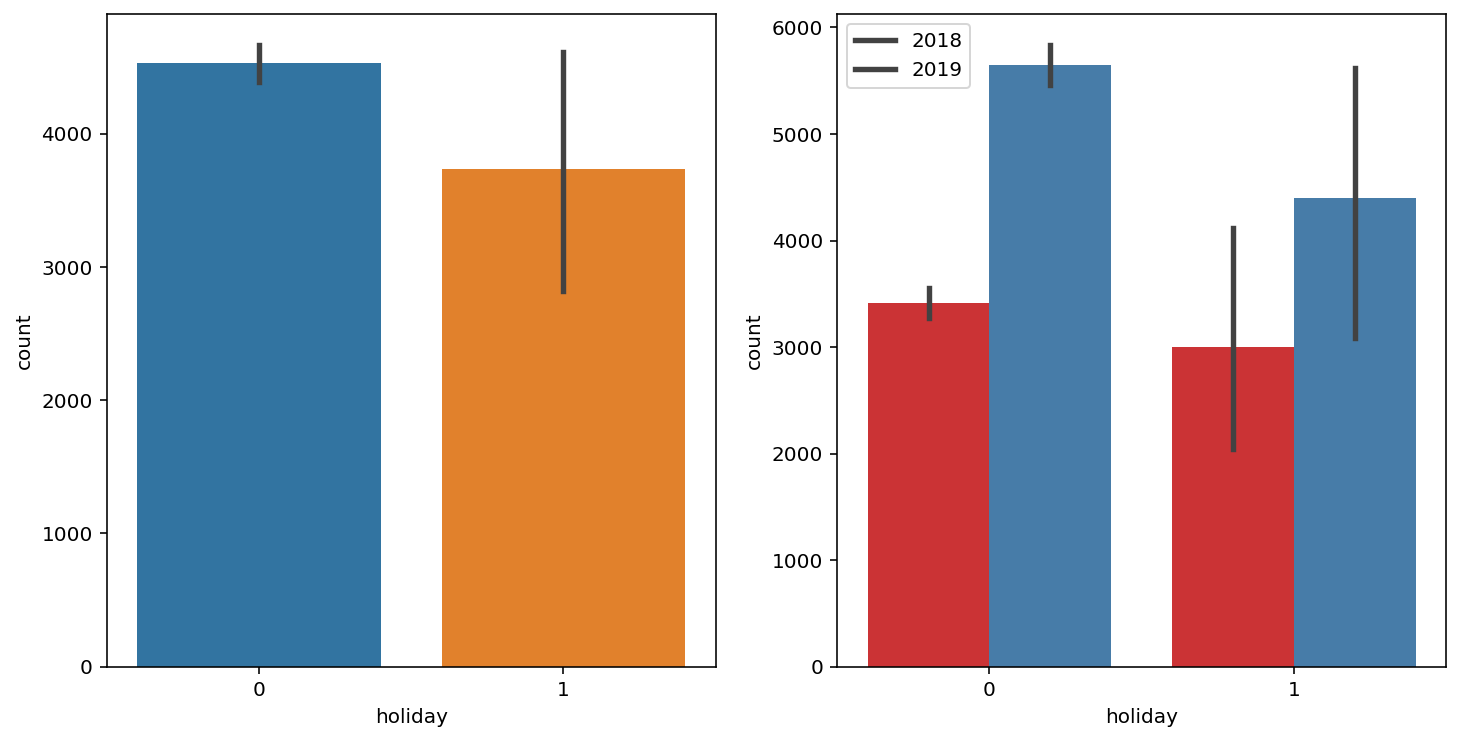

In [98]:
plot_bar_columns('holiday')

Bookings are higher on non\-holidays as people would commute more on those days



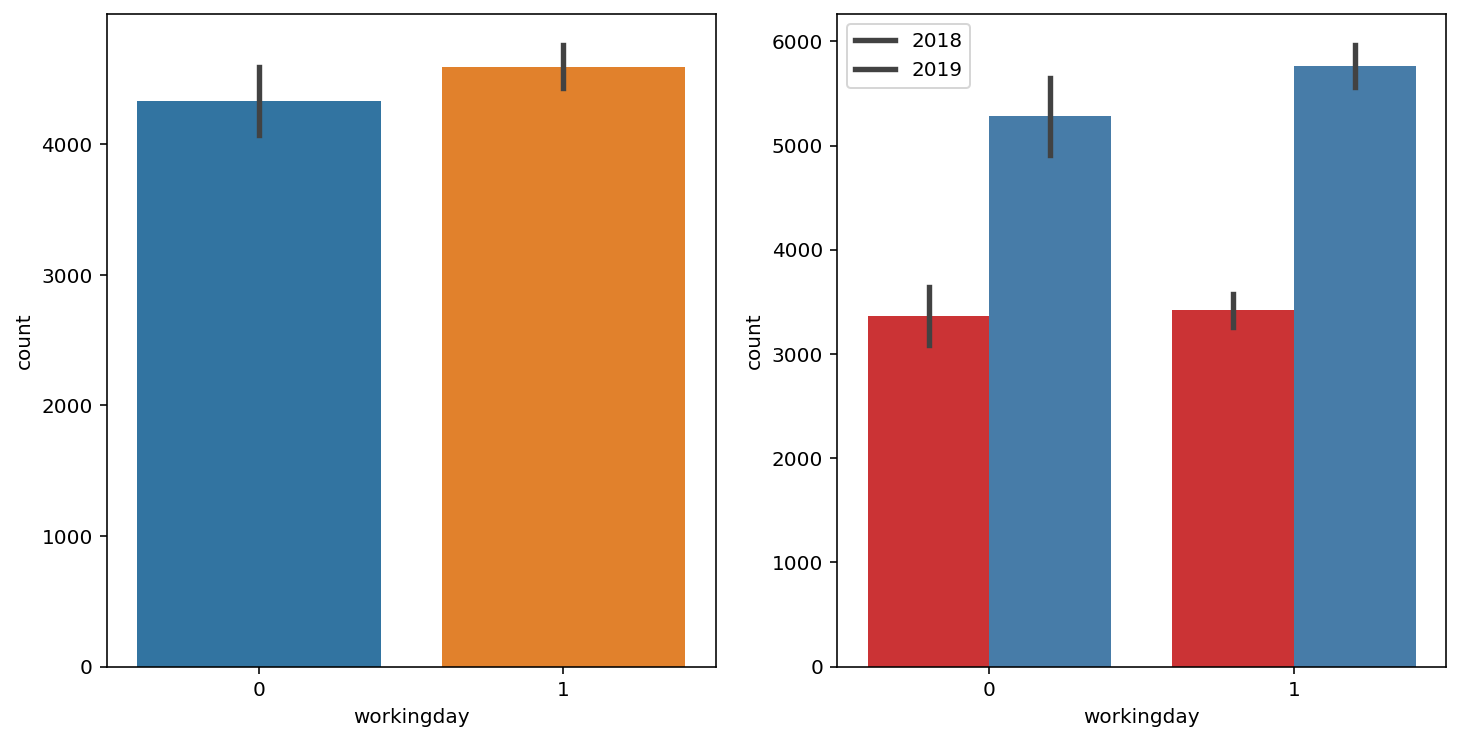

In [99]:
plot_bar_columns('workingday')


Users seem to be high in case of a working day. Overall 2019 was a better year with more customers as compared to 2018


**Data Preparation**


In [100]:
# Dummy variable creation 

months_df=pd.get_dummies(bike_data.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_data.season,drop_first=True)

In [101]:
data_new = pd.concat([bike_data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)


In [102]:
data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [103]:
data_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)


In [104]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [105]:
varlist = ['aug','dec','feb','jan','july','june','mar','may','nov','oct','sep','mon','sat','sun','thu','tue','wed','Light_snowrain','Misty','spring','summer','winter']

data_new[varlist]=data_new[varlist].apply(lambda x: x.map({True:1,False:0}))
data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


**Splitting into train & test**


In [106]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [107]:
dtrain,dtest = train_test_split(data_new, train_size=0.7, random_state=100)
print(dtrain.shape)
print(dtest.shape)

(510, 30)
(220, 30)


In [108]:
#Rescaling features
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','count']
dtrain[num_vars] = scaler.fit_transform(dtrain[num_vars])

In [109]:
dtrain.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


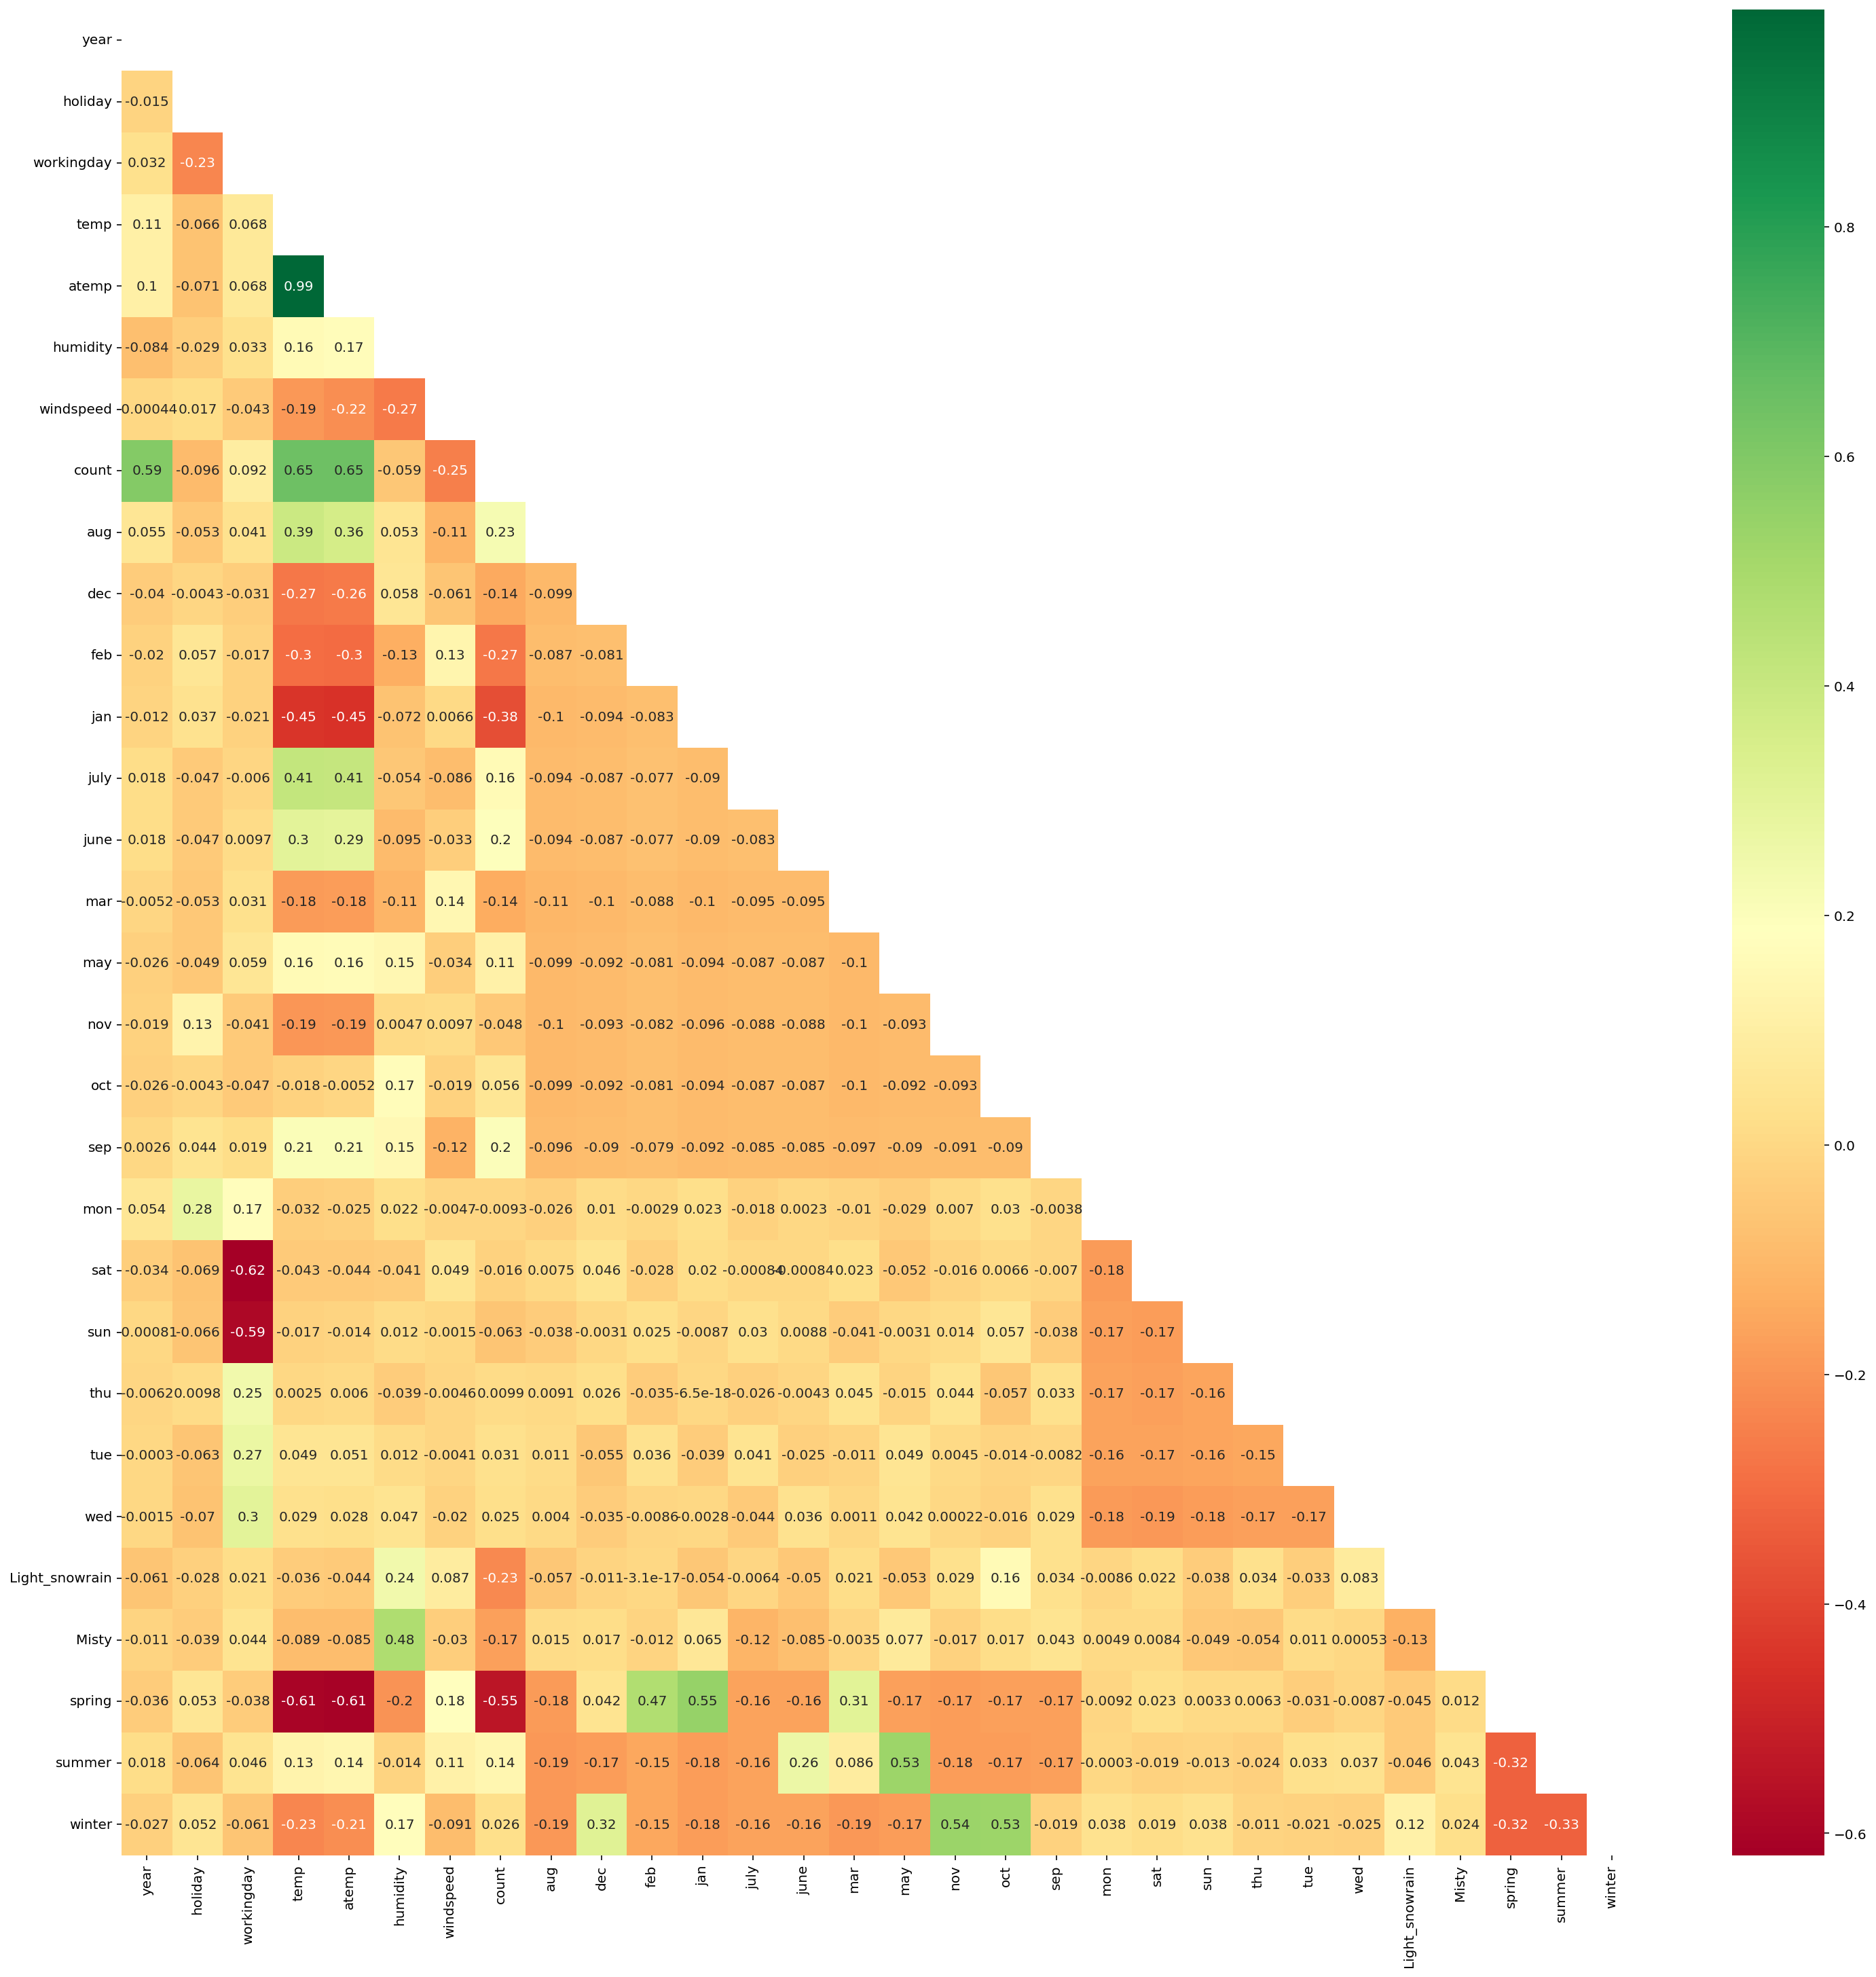

In [110]:
plt.figure(figsize = (25,25))
matrix = np.triu(dtrain.corr())
sns.heatmap(dtrain.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Count has high correlation with year and temp


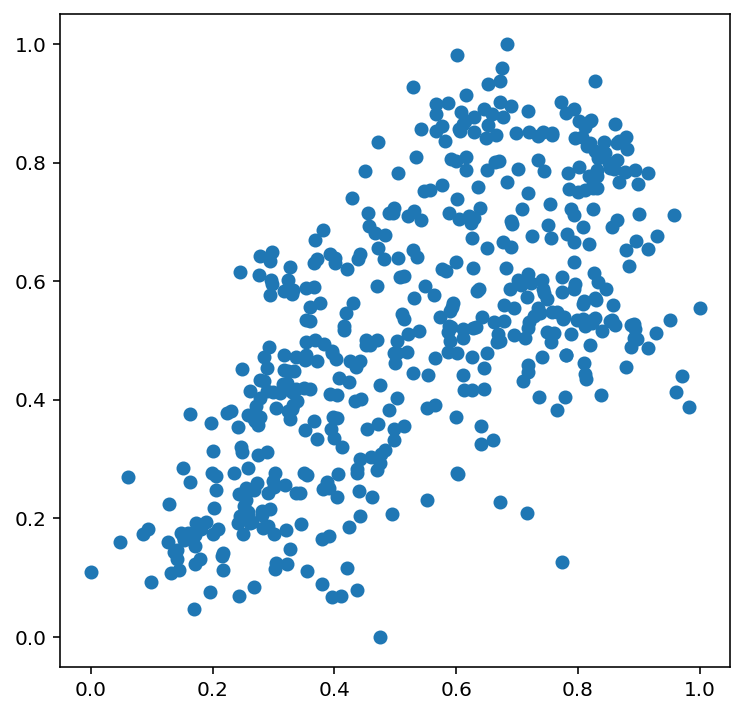

In [111]:
plt.figure(figsize=[6,6])
plt.scatter(dtrain['temp'], dtrain['count'])
plt.show()

Visualization confirms the positive correlation between temp and count.



In [112]:
# Building the Linear Model

y_train = dtrain.pop('count')
X_train = dtrain

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [115]:
#Selected variables
col = X_train.columns[rfe.support_]
print(col)


Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [116]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [117]:
X_train_rfe = X_train[col]


In [118]:
calculateVIF(X_train_rfe)


,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


**Building the model**


In [119]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        17:22:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [120]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [121]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        17:22:25   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [122]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


VIF can still be improved



In [123]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          8.68e-189
Time:                        17:22:26   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [124]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


In [125]:

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          7.12e-189
Time:                        17:22:28   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [126]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


In [127]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.42e-188
Time:                        17:22:30   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [128]:
# We can drop spring variable as it has high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


VIF value now seems to be good as it came below 5.



In [129]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.13e-188
Time:                        17:22:34   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

We can cosider the above model i.e lr\_6, as it seems to have very low multicolinearity between the predictors and the p\-values for all the predictors seems to be significant.

F\-Statistics value of 253 \(which is greater than 1\) and the prob of 3.13e\-188 i.e almost equals to zero, states that the overall model is significant


In [130]:
lr_6.params


const             0.075009
year              0.233139
workingday        0.056117
temp              0.549892
windspeed        -0.155203
sep               0.097365
sat               0.067500
Light_snowrain   -0.287090
Misty            -0.080022
summer            0.088621
winter            0.130655
dtype: float64

**Residual Analysis of the train data and validation**


In [131]:
X_train_lm_6


,const,year,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,1,0


In [132]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

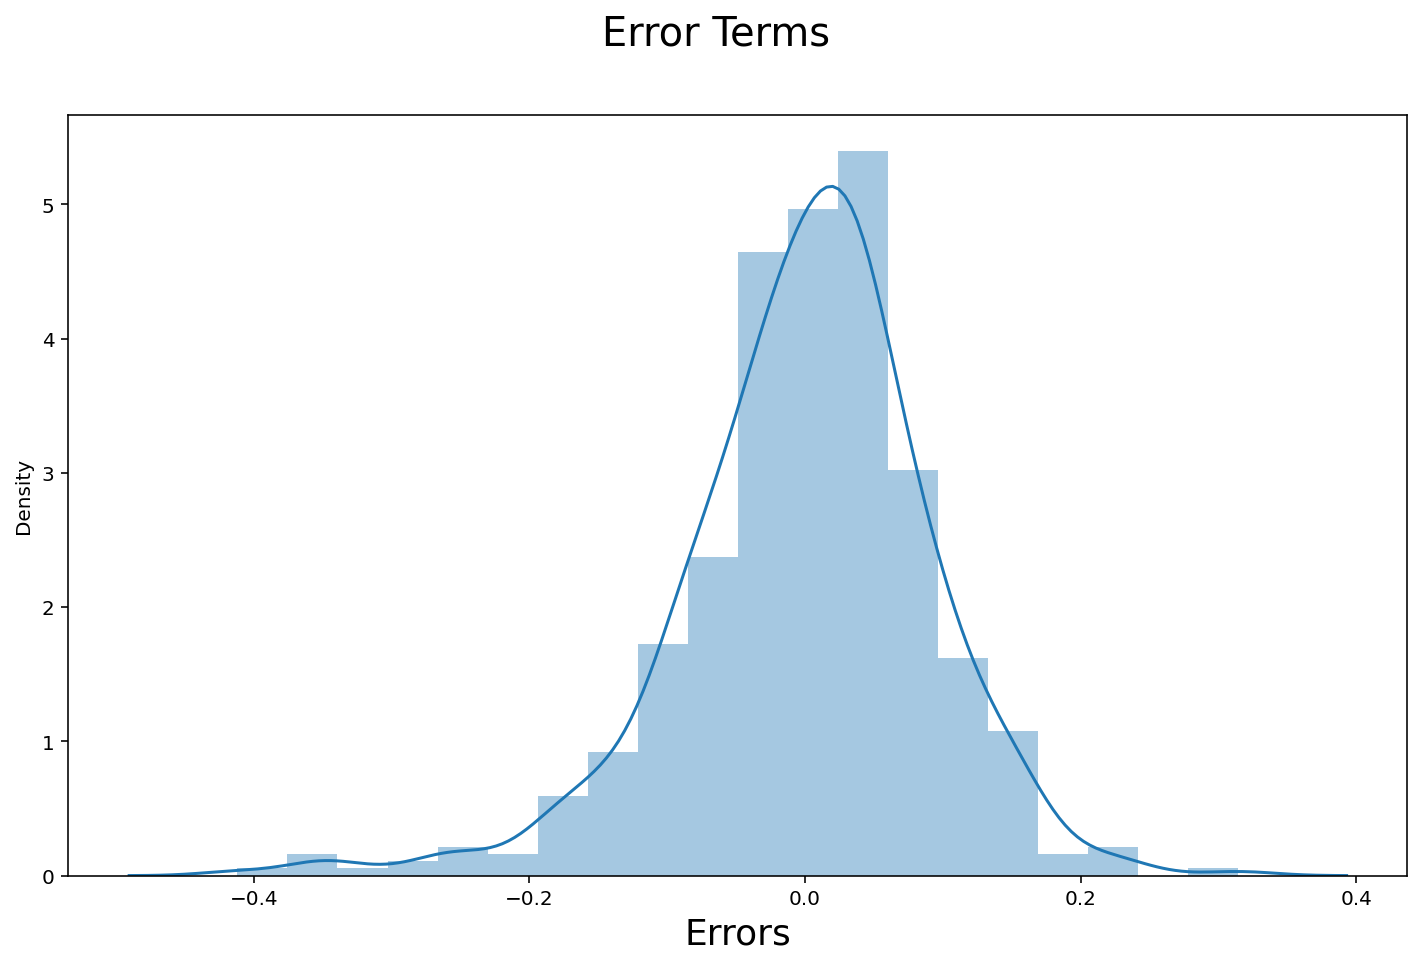

In [133]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution


In [134]:
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


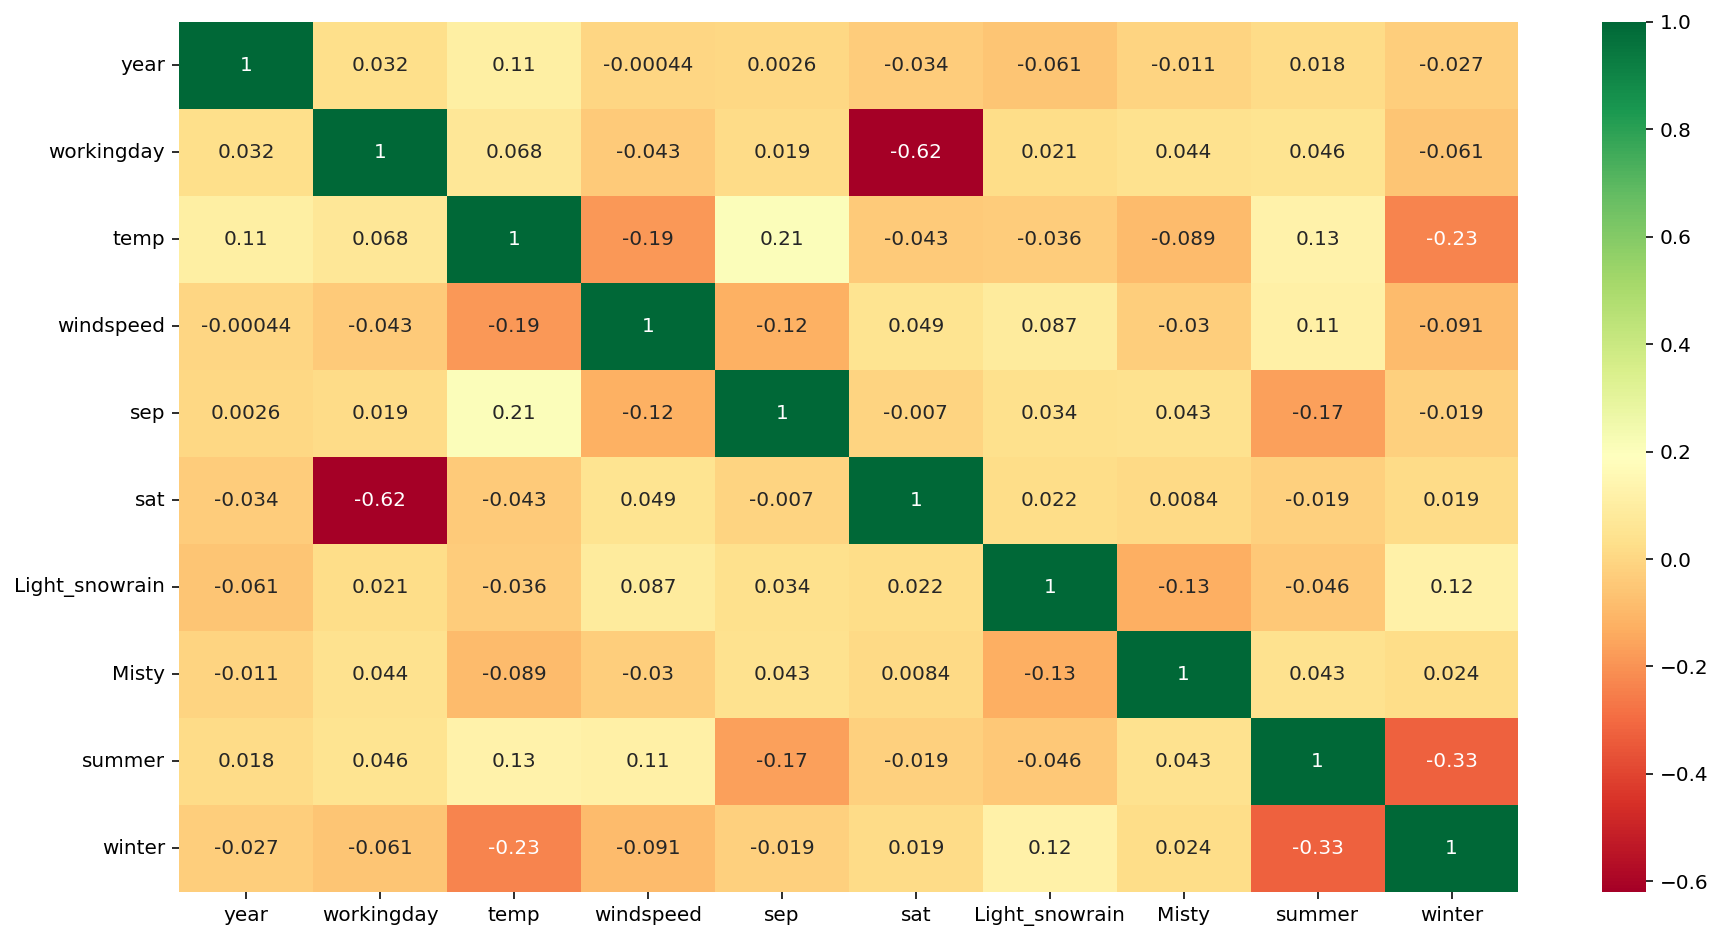

In [135]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

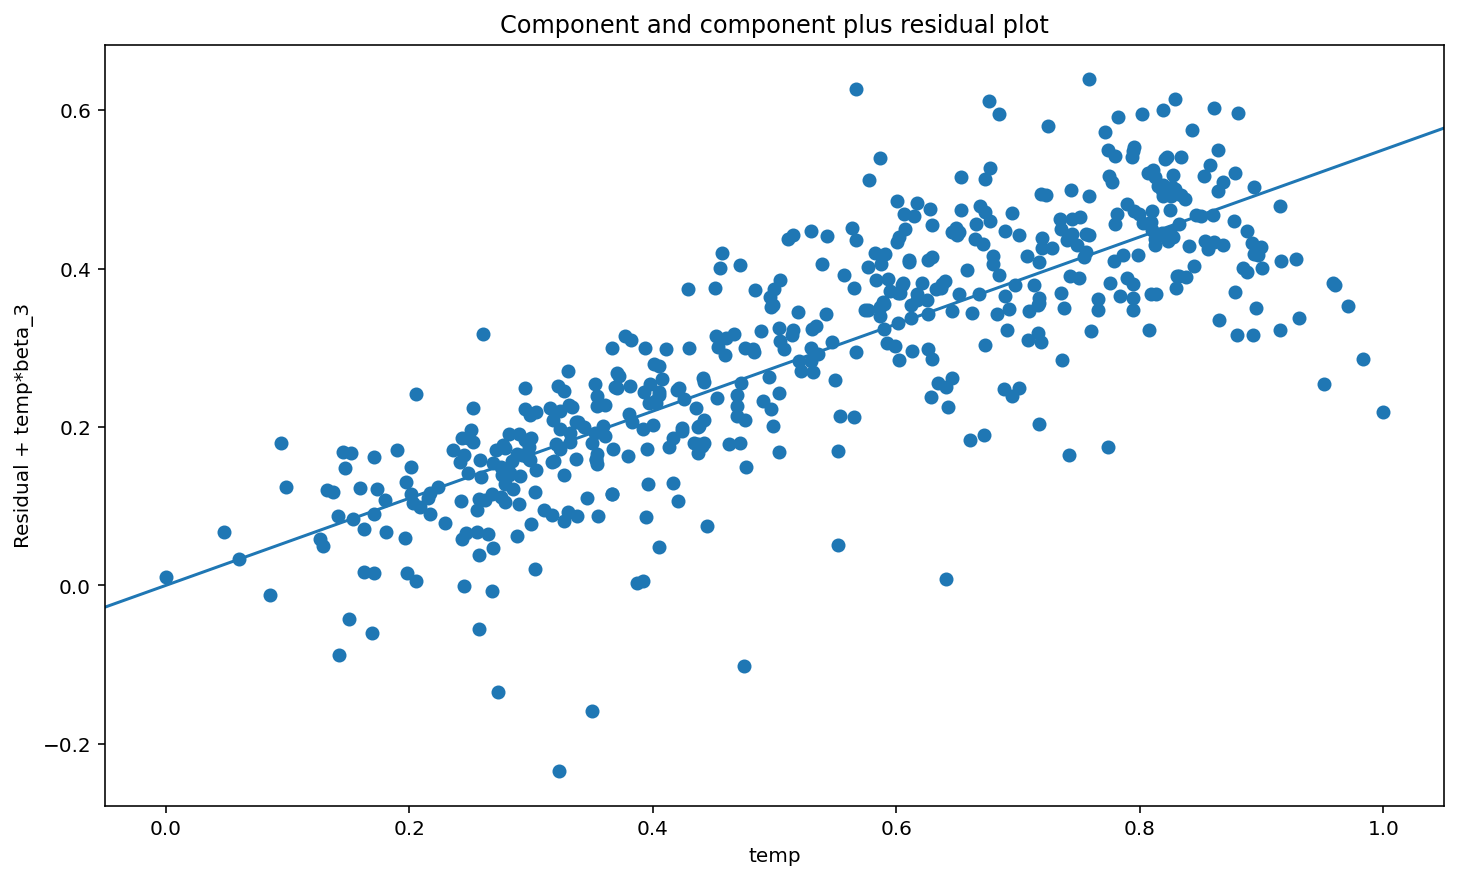

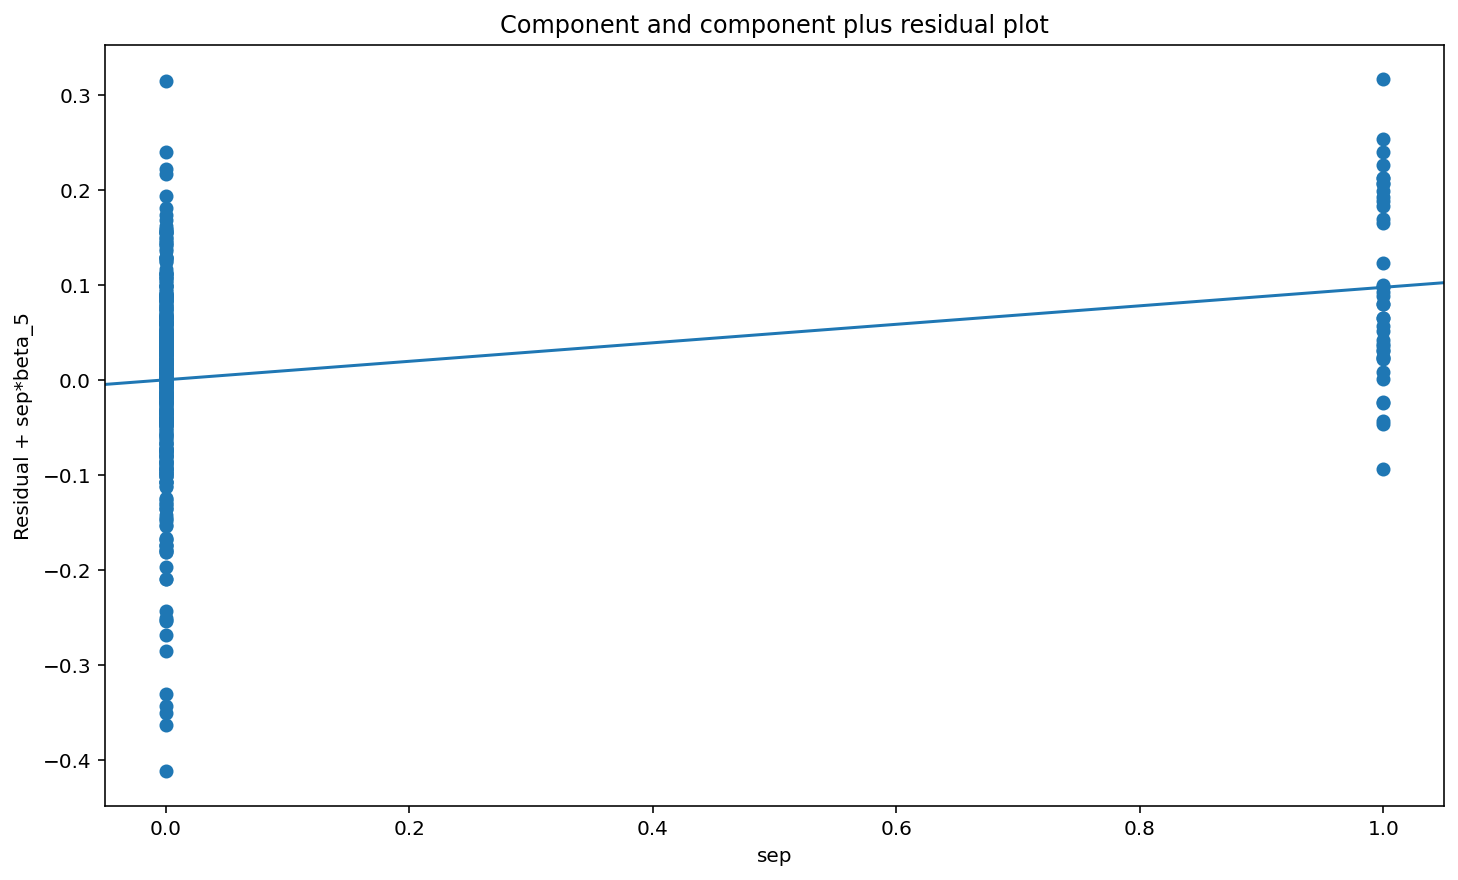

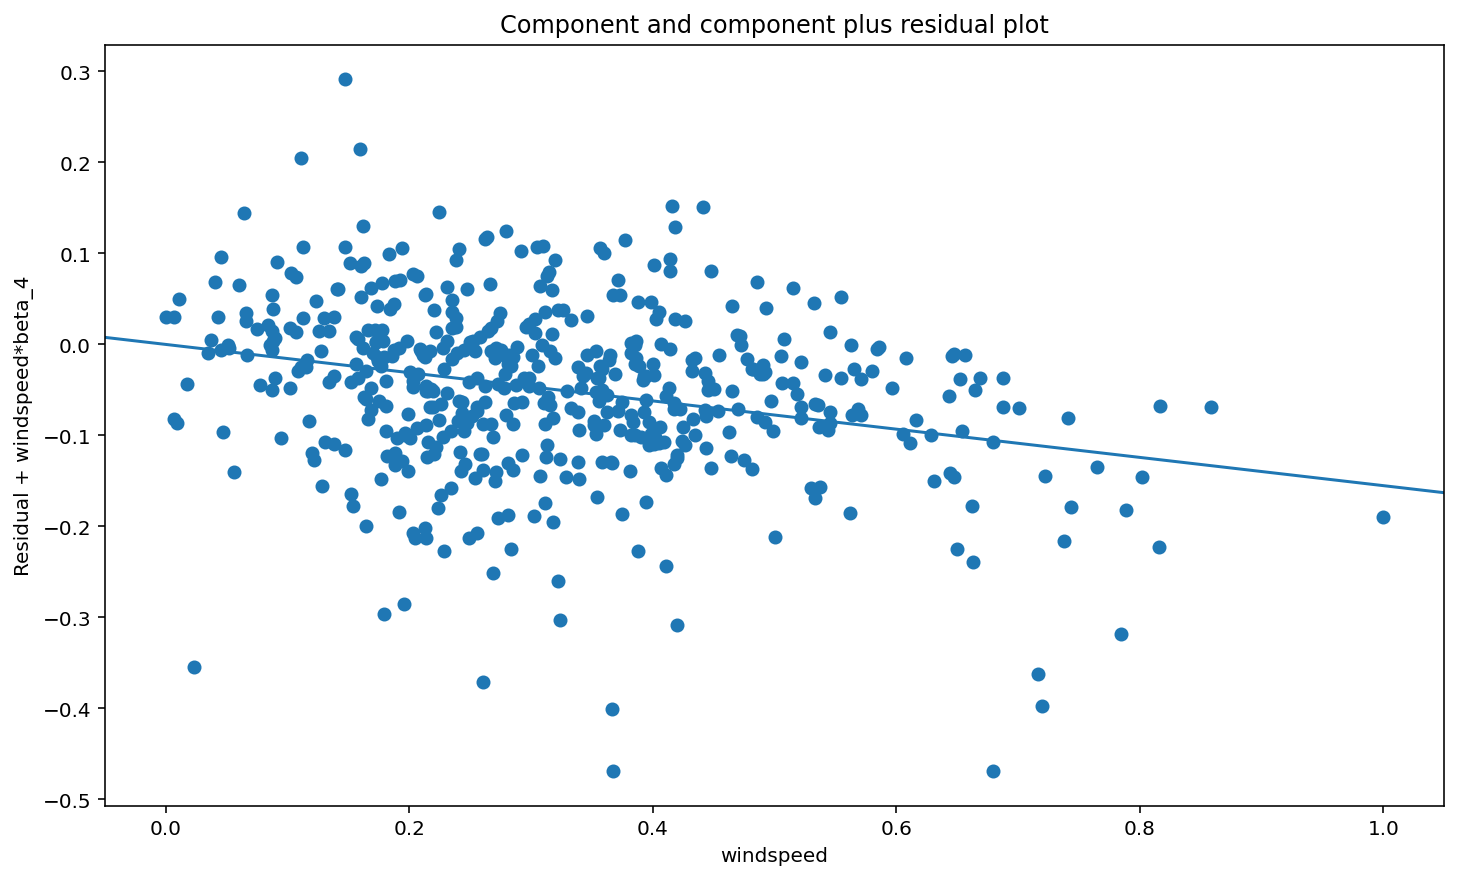

In [136]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.



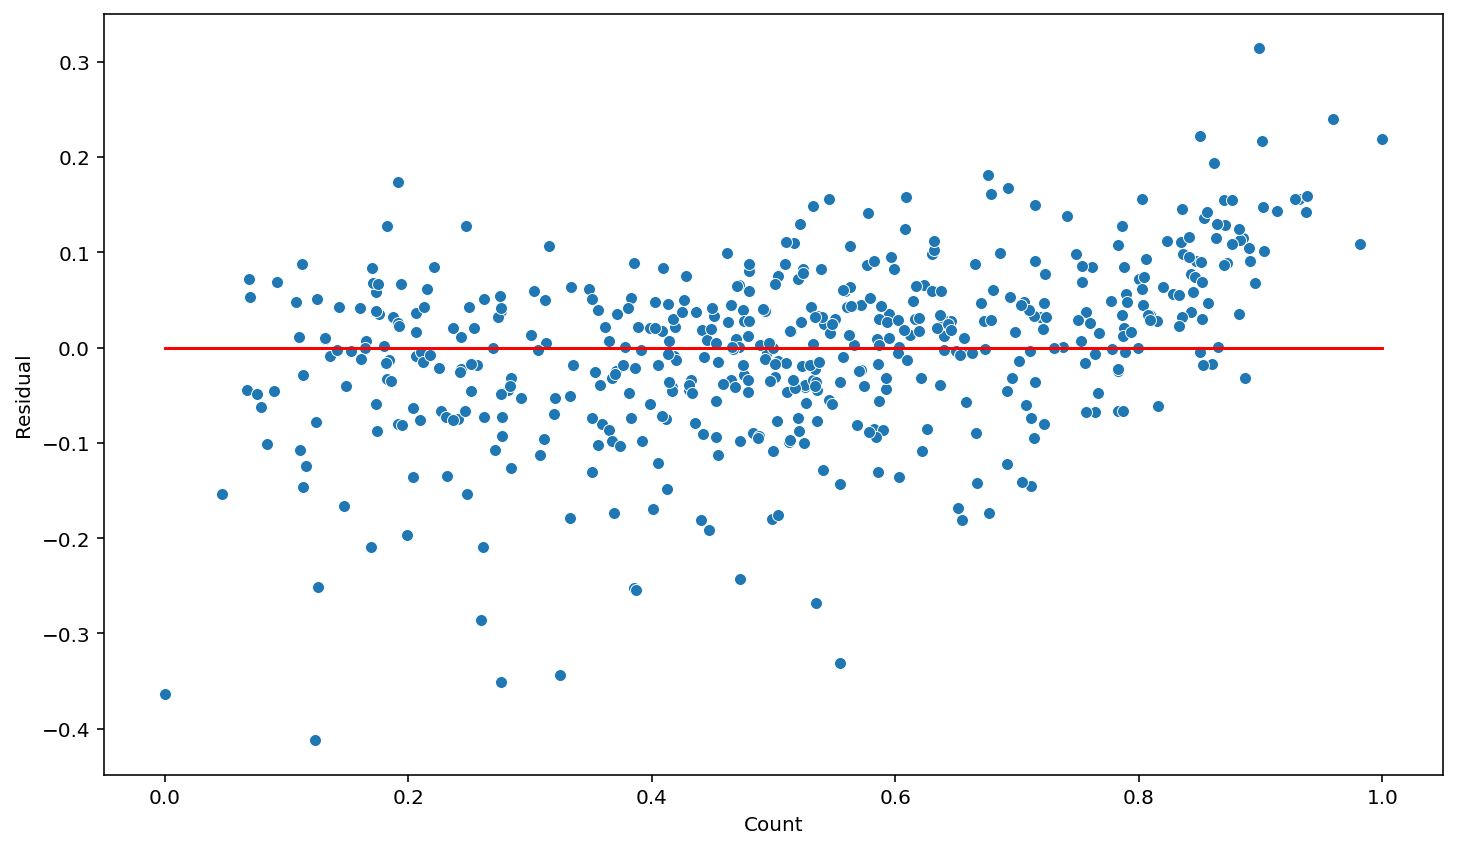

In [137]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

**Independence of residuals**

Durbin\-Watson value of final model lr\_6 is 2.089, which signifies there is no autocorrelation.


**Making Predictions Using the Final Model**


In [138]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
dtest[num_vars] = scaler.transform(dtest[num_vars])
dtest.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [139]:
y_test = dtest.pop('count')
X_test = dtest

In [140]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [141]:
y_pred = lr_6.predict(X_test_lm_6)


In [142]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

**Model Evaluation**


Text(0, 0.5, 'y_pred')

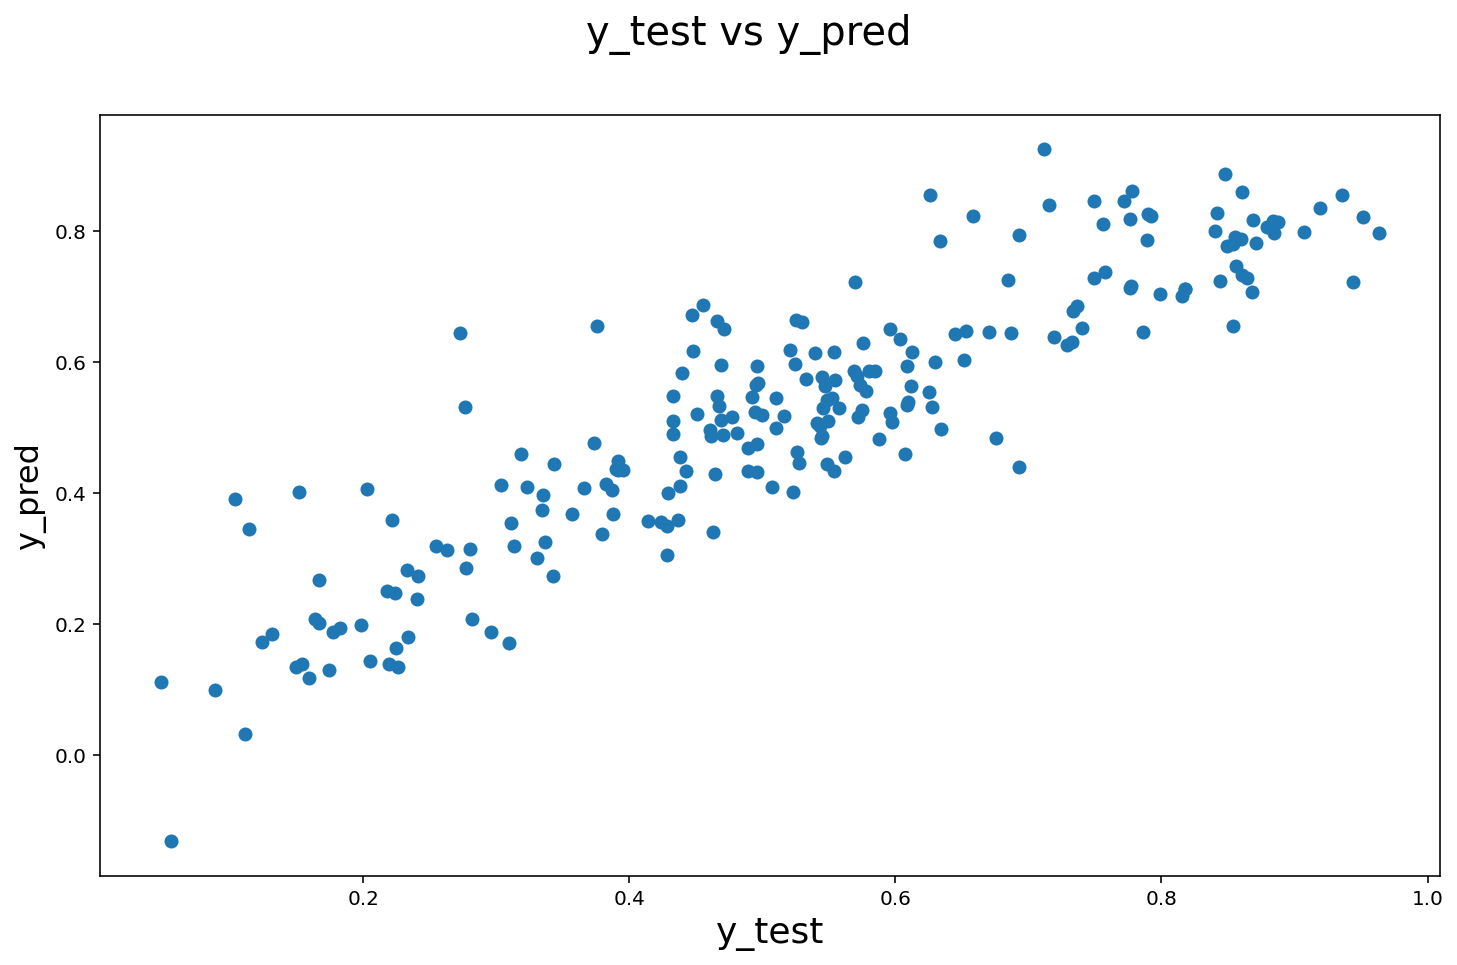

In [143]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [144]:
round(lr_6.params,4)

const             0.0750
year              0.2331
workingday        0.0561
temp              0.5499
windspeed        -0.1552
sep               0.0974
sat               0.0675
Light_snowrain   -0.2871
Misty            -0.0800
summer            0.0886
winter            0.1307
dtype: float64

In [145]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)


0.7864


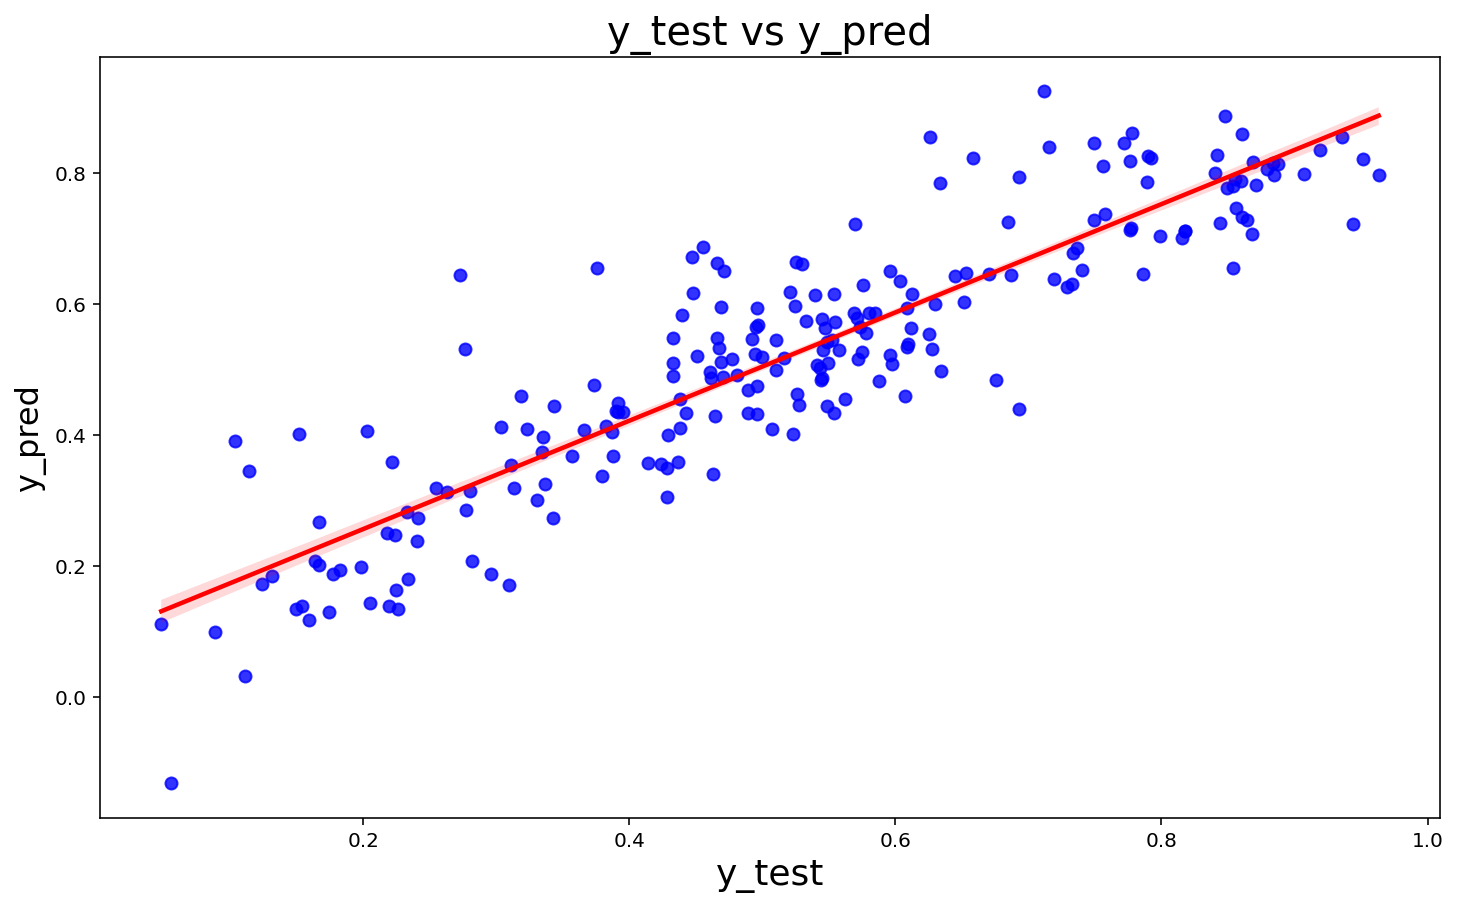

In [146]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:

\- Train dataset R^2          : 0.835

\- Test dataset R^2           : 0.7961

\- Train dataset Adjusted R^2 : 0.832

\- Test dataset Adjusted R^2  : 0.7864

Demand of bikes depend on year, workingday, temp, windspeed, sep, sat, Light\_snowrain, Misty, summer and winter.

